### Project: Building A Handwritten Digits Classifier

In this project the goal is to train, test and improve a few different deep neural networks for image classification. More specifically, we will build models that can classify handwritten digits, exploring the effectiveness of deep, neural networks at classifying images.

![Image](https://images.unsplash.com/photo-1624117987059-f1b8c83edfaa?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1746&q=80)
__Photo by Markus Krisetya on Unsplash__

### Working With Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. We will use __load_digits()__ from the sklearn.datasets package, that returns a copy of the [hand-written digits dataset from UCI](http://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits).

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed(10)
digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
data1 = pd.DataFrame(data= np.c_[digits_data['data'], digits_data['target']],
                     columns= digits_data['feature_names'] + ['target'])
data1.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [4]:
labels = pd.Series(digits_data['target'])
labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

### Working With Image Data

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

In [5]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


To reshape the image, we need to convert a training example to a numpy array 
(excluding the label column) and pass the result into that into the numpy.reshape() function:

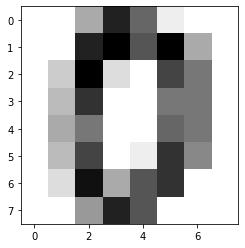

In [6]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
# Now that the data is in the right shape, we can visualize it using pyplot.imshow() function:
plt.imshow(np_image, cmap='gray_r')

We will use matplotlib to visualize some of the images in the dataset:

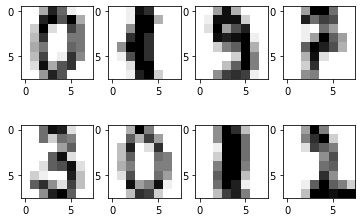

In [7]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = accuracy_score(test_labels, predictions)
    return overall_accuracy

def cross_validate(k, df, target):
    kf = KFold(n_splits=4)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        knc = train_knn(k, train_features, train_target)
        train_accuracy = test(knc, train_features, train_target)
        test_accuracy = test(knc, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies
        

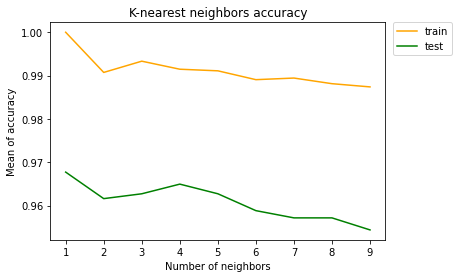

In [9]:
k_values = list(range(1,10))
train_mean_accuracies = []
test_mean_accuracies = []
for k in k_values:
    train_accuracies, test_accuracies = cross_validate(k, data, labels)
    train_mean_accuracies.append(np.mean(train_accuracies))
    test_mean_accuracies.append(np.mean(test_accuracies))
x = range(1, 10)
y = train_mean_accuracies
plt.plot(x, y, color = 'orange', label = 'train')
y = test_mean_accuracies
plt.plot(x, y, color = 'green', label = 'test')

plt.xlabel('Number of neighbors')
plt.ylabel('Mean of accuracy')
plt.title('K-nearest neighbors accuracy')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)

In [10]:
test_mean_accuracies

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9627233358079683,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697]

Using k-nearest neighbors we got an accuracy of 96.7%. However there are a few downsides to using this algorithm:
* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

### Neural Network With One Hidden Layer

Let's now try a neural network with a single hidden layer. We will use th MLPClassifier

In [11]:
from sklearn.neural_network import MLPClassifier
def train_nn(neuron_arch, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=1300)
    mlp.fit(train_features, train_target)
    return mlp
    
def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_result = pd.DataFrame()
    train_result['true_result'] = test_target
    train_result['prediction'] = predictions
    accuracy = sum(train_result["prediction"] == train_result["true_result"])/len(train_result)    
    return accuracy
 
def cross_validate(n_neurons, df, target):
    kf = KFold(n_splits=4)
    accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_nn(n_neurons, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)    
    return accuracies




Using 4-fold cross validation we will:

* Train and test a neural network model using a single hidden layer of 8 neurons.
* Train and test a neural network model using a single hidden layer of 16 neurons.
* Train and test a neural network model using a single hidden layer of 32 neurons.
* Train and test a neural network model using a single hidden layer of 64 neurons.
* Train and test a neural network model using a single hidden layer of 128 neurons.
* Train and test a neural network model using a single hidden layer of 256 neurons.

After this, we will rank the performance of the models by the overall test accuracies.

Text(0.5, 1.0, 'Neural Network with single hidden layer (test set)')

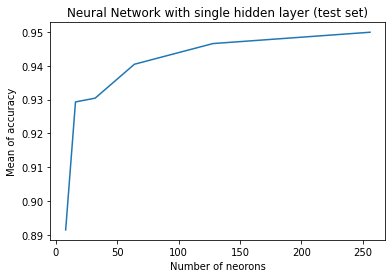

In [12]:
neurons = [(8,),
          (16,),
          (32,),
          (64,),
          (128,),
          (256,)]
mean_accuracies = []
for n in neurons:
    accuracies = cross_validate(n, data, labels)
    mean_accuracies.append(np.mean(accuracies))
x = [i[0] for i in neurons]
y = mean_accuracies
plt.plot(x, y)
plt.xlabel('Number of neorons')
plt.ylabel('Mean of accuracy')
plt.title('Neural Network with single hidden layer (test set)')

We can see that by increasing the number of neurons in a single layer neural network, accuracy also increased. Next, for each model, we will compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [13]:
def cross_validate(n_neurons, df, target, nsplits = 4):
    kf = KFold(n_splits=nsplits)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_nn(n_neurons, train_features, train_target)
        train_accuracy = test(model, train_features, train_target)
        test_accuracy = test(model, test_features, test_target)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    return train_accuracies, test_accuracies
train_accuracies, test_accuracies = cross_validate((8,), data, labels)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print("mean_train_accuracies = ", mean_train_accuracies)
print("mean_test_accuracies = ", mean_test_accuracies)

mean_train_accuracies =  0.9996289424349968
mean_test_accuracies =  0.8914922048997772


In [14]:
def run_draw_nn(neurons, plt_title, nsplits = 4):
    train_mean_accuracies = []
    test_mean_accuracies = []
    for n in neurons:
        train_accuracies, test_accuracies = cross_validate(n, data, labels, nsplits)
        train_mean_accuracies.append(np.mean(train_accuracies))
        test_mean_accuracies.append(np.mean(test_accuracies))
    x = [i[0] for i in neurons]
    y = train_mean_accuracies
    plt.plot(x, y, color = 'orange', label = 'train')
    y = test_mean_accuracies
    plt.plot(x, y, color = 'green', label = 'test')
    plt.xlabel('Number of neorons')
    plt.ylabel('Mean of accuracy')
    plt.title(plt_title)
    plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
    return train_mean_accuracies, test_mean_accuracies

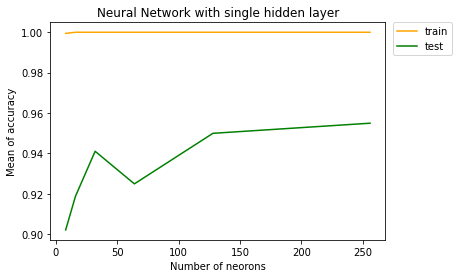

In [15]:
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with single hidden layer')

In [16]:
test_mean_accuracies

[0.9020477604553329,
 0.9187465973768869,
 0.9410121257114575,
 0.9248725562979461,
 0.9499170997277901,
 0.9549282355852512]

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 95.4%

### Neural Network with Two Hidden Layers

Let's try using two hidden layers and continue to increase the number of neurons in each layer. We know that adding more layers to a network and adding more neurons in the hidden layers can improve the model's ability to learn more complex relationships. We will modify the neural network training pipeline to use 2 hidden layers instead in the network.

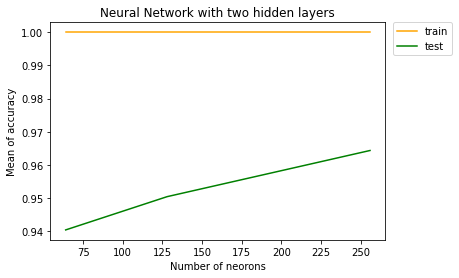

In [17]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(nn_two_neurons, 'Neural Network with two hidden layers')

In [18]:
test_mean_accuracies

[0.9404479089334323, 0.9504689433308586, 0.9643763919821826]

Using two hidden layers improved our simple accuracy to 96.4%

### Neural Network with Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

Next we will:

Train a neural network model using 3 hidden layers:
* 10 neurons in the first hidden layer.
* 10 neurons in the second hidden layer.
* 10 neurons in the third hidden layer.


Train a neural network model using 3 hidden layers:
* 64 neurons in the first hidden layer.
* 64 neurons in the second hidden layer.
* 64 neurons in the third hidden layer.


Train a neural network model using 3 hidden layers:
* 128 neurons in the first hidden layer.
* 128 neurons in the second hidden layer.
* 128 neurons in the third hidden layer.

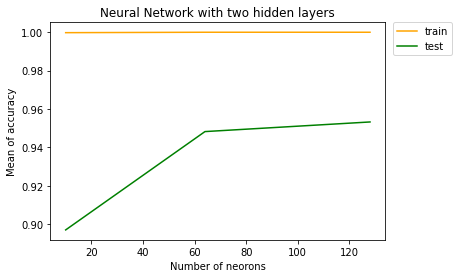

In [19]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

train_mean_accuracies, test_mean_accuracies = run_draw_nn(nn_three_neurons, 'Neural Network with two hidden layers', 6)

In [20]:
test_mean_accuracies

[0.8970382757339279, 0.9482552954292084, 0.953270159791899]

Using three hidden layers returned a simple accuracy of nearly 95.3%, even with six-fold cross validation.

### Conclusion

In this project we used different models to classify handwritten digits. We got the best accuracy with a neural network model that uses two hidden layers with 256 neurons in the first hidden layer and 256 neurons in the second hidden layer.